In [59]:
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
url = '/content/drive/MyDrive/nyc-rolling-sales.csv'
df = pd.read_csv(url)
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

### Processing

In [32]:
df.duplicated().sum()

0

In [50]:
df.isnull().sum().sum()

0

### Measure of central Tendency: Mean

In [34]:
# Rata-rata pada kolom TAX CLASS AT TIME OF SALE
mean_value = df['TAX CLASS AT TIME OF SALE'].mean()
mean_value

1.657484505842835

### Measure of central Tendency: Median

In [35]:
# Nilai tengah pada kolom TAX CLASS AT TIME OF SALE
mean_value = df['TAX CLASS AT TIME OF SALE'].median()
mean_value

2.0

### Measure of central Tendency: Modus

In [36]:
# Menghitung modus dari kolom TAX CLASS AT TIME OF SALE
mode_value = df['TAX CLASS AT TIME OF SALE'].mode().values[0]
print(mode_value)

1


### Measure of central Spread: Range

In [37]:
### Menghitung Range dari kolom TOTAL UNITS
value = df['TOTAL UNITS'].to_numpy()
range_value = np.ptp(value)
range_value

2261

### Measure of central Spread: Variance

In [38]:
# Menghitung variansi dari kolom TOTAL UNITS
variance_value = df['TAX CLASS AT TIME OF SALE'].var()

variance_value


0.6713200208724456

### Measure of central Spread: Standard Deviation

In [39]:
# Menghitung deviasi standar dari kolom TAX CLASS AT TIME OF SALE
std_deviation = df['TAX CLASS AT TIME OF SALE'].std()

print(std_deviation)


0.8193412115061988


### Probability Distribution

<ipython-input-48-2b519eba5fcb>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data, bins=100, kde=True, color='skyblue', hist_kws={"linewidth": 15, 'alpha': 1})


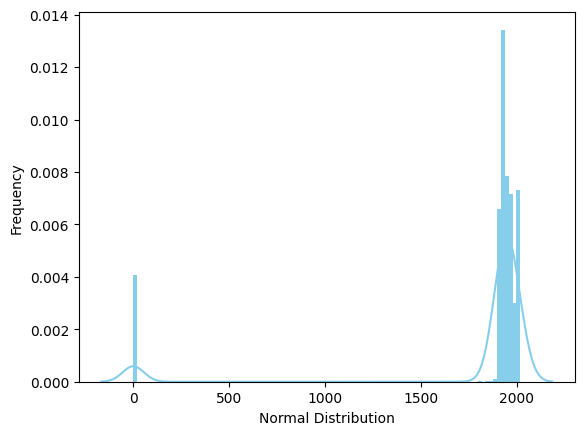

In [48]:
# Memilih kolom YEAR BUILT dan mengonversinya menjadi array NumPy
data = df['YEAR BUILT'].to_numpy()

# Menggunakan seaborn untuk membuat distribusi plot
ax = sns.distplot(data, bins=100, kde=True, color='skyblue', hist_kws={"linewidth": 15, 'alpha': 1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')

plt.show()


### Convidence Intervals

<ipython-input-62-4c78f1b7d2fb>:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data, bins=100, kde=True, color='skyblue', hist_kws={"linewidth": 15, 'alpha': 0.5})


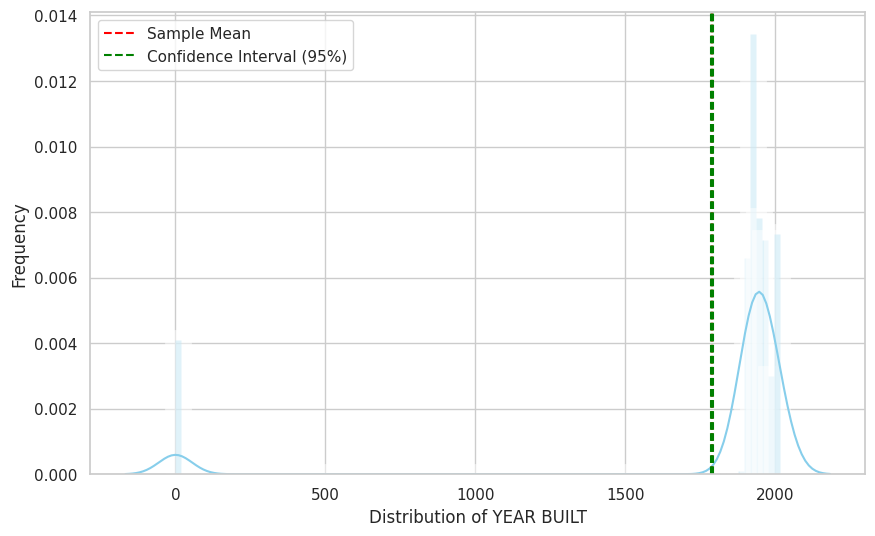

Interval Kepercayaan 95% untuk Mean: (1785.7009145825882, 1792.9450380123876)


In [62]:
# Memilih kolom "YEAR BUILT" dan mengonversinya menjadi array NumPy
data = df['YEAR BUILT'].to_numpy()

# Menghitung mean, standar deviasi, dan ukuran sampel
sample_mean = np.mean(data)
sample_std = np.std(data, ddof=1)  # ddof=1 untuk menggunakan standar deviasi sampel
sample_size = len(data)

# Menghitung interval kepercayaan 95% untuk mean
confidence_level = 0.95
alpha = 1 - confidence_level
z_critical = stats.t.ppf(1 - alpha / 2, df=sample_size - 1)  # Mendapatkan nilai kritis t dari distribusi t
margin_of_error = z_critical * (sample_std / np.sqrt(sample_size))
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

# Visualisasi distribusi data dan interval kepercayaan
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))

# Distribusi plot
ax = sns.distplot(data, bins=100, kde=True, color='skyblue', hist_kws={"linewidth": 15, 'alpha': 0.5})
ax.set(xlabel='Distribution of YEAR BUILT', ylabel='Frequency')

# Tambahkan garis vertikal untuk mean
plt.axvline(x=sample_mean, color='red', linestyle='--', label='Sample Mean')

# Tambahkan interval kepercayaan
plt.axvline(x=confidence_interval[0], color='green', linestyle='--', label='Confidence Interval (95%)')
plt.axvline(x=confidence_interval[1], color='green', linestyle='--')

plt.legend()
plt.show()

print("Interval Kepercayaan 95% untuk Mean:", confidence_interval)


### Hypothesis testing

In [64]:
from scipy import stats
kolom_tax_class = df['TAX CLASS AT TIME OF SALE']
rata_rata = 2  # Nilai yang digunakan dalam H0
t_stat, p_value = stats.ttest_1samp(kolom_tax_class, rata_rata)
if p_value < 0.05:
    print("Hipotesis Alternatif diterima: Rata-rata lebih besar dari 2.")
else:
    print("Hipotesis Nol diterima: Tidak cukup bukti bahwa rata-rata lebih besar dari 2.")


Hipotesis Alternatif diterima: Rata-rata lebih besar dari 2.


In [65]:
from scipy import stats
kolom_year_built = df['YEAR BUILT']
t_stat, p_value = stats.normaltest(kolom_year_built)
if p_value < 0.05:
    print("Hipotesis Alternatif diterima: Distribusi tidak normal.")
else:
    print("Hipotesis Nol diterima: Tidak cukup bukti bahwa distribusi tidak normal.")


Hipotesis Alternatif diterima: Distribusi tidak normal.


In [68]:
from scipy import stats

# Convert 'SALE PRICE' to a numeric data type (e.g., float)
df['SALE PRICE'] = pd.to_numeric(df['SALE PRICE'], errors='coerce')

# Remove rows with NaN values in 'SALE PRICE' if necessary
df = df.dropna(subset=['SALE PRICE'])

kolom_total_units = df['TOTAL UNITS']
kolom_sale_price = df['SALE PRICE']
t_stat, p_value = stats.pearsonr(kolom_total_units, kolom_sale_price)

if p_value < 0.05:
    print("Hipotesis Alternatif diterima: Ada korelasi antara TOTAL UNITS dan SALE PRICE.")
else:
    print("Hipotesis Nol diterima: Tidak cukup bukti bahwa ada korelasi antara keduanya.")


Hipotesis Alternatif diterima: Ada korelasi antara TOTAL UNITS dan SALE PRICE.


### Korelasi antar fitur

<ipython-input-69-e90a25df8756>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


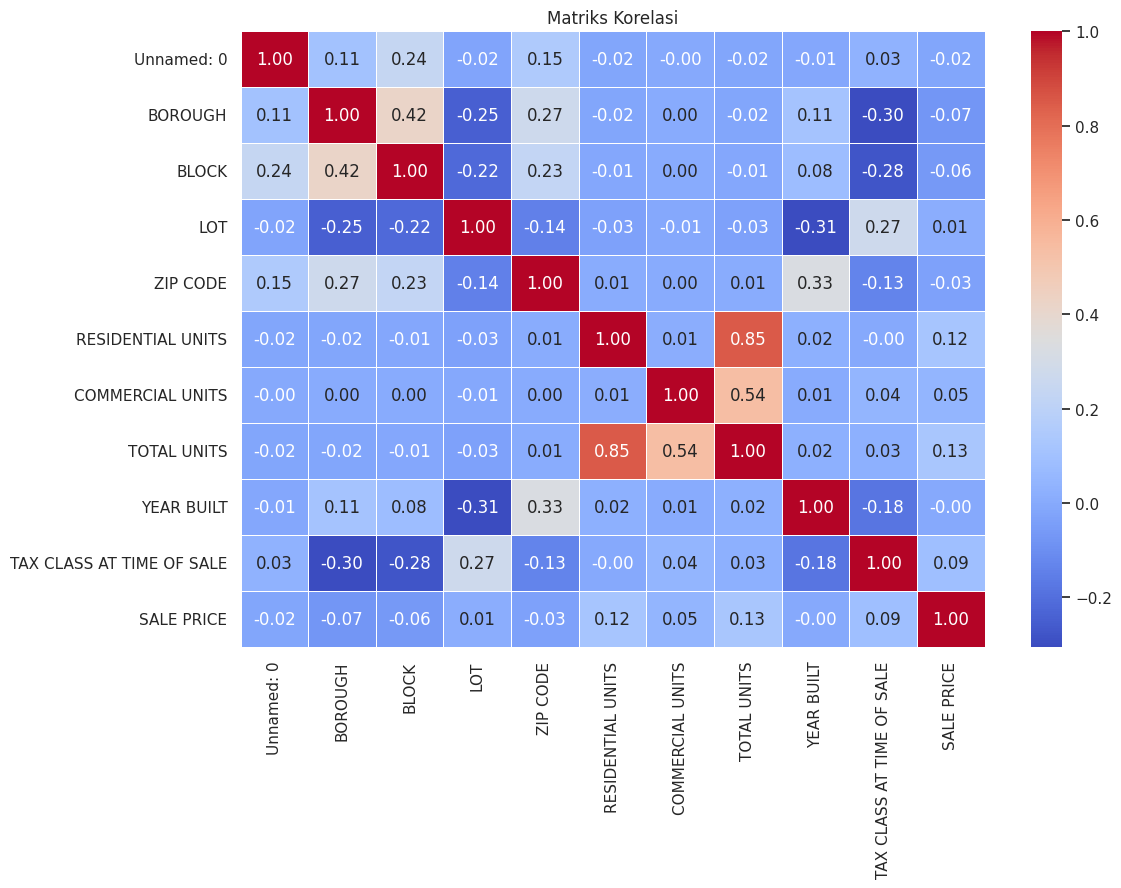

In [69]:
# Menghitung matriks korelasi
correlation_matrix = df.corr()

# Membuat heatmap dari matriks korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriks Korelasi')
plt.show()
